<a href="https://colab.research.google.com/github/jeetsj/ML_GWU/blob/master/Human_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import silhouette_score
import matplotlib.pyplot as plt 
np.random.seed(21)

In [33]:
data = pd.read_csv("/content/drive/MyDrive/ML_Course/ML_project3/human_train.csv")
data.head(5)

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,tBodyAcc.max.Y,tBodyAcc.max.Z,tBodyAcc.min.X,tBodyAcc.min.Y,tBodyAcc.min.Z,tBodyAcc.sma,tBodyAcc.energy.X,tBodyAcc.energy.Y,tBodyAcc.energy.Z,tBodyAcc.iqr.X,tBodyAcc.iqr.Y,tBodyAcc.iqr.Z,tBodyAcc.entropy.X,tBodyAcc.entropy.Y,tBodyAcc.entropy.Z,tBodyAcc.arCoeff.X.1,tBodyAcc.arCoeff.X.2,tBodyAcc.arCoeff.X.3,tBodyAcc.arCoeff.X.4,tBodyAcc.arCoeff.Y.1,tBodyAcc.arCoeff.Y.2,tBodyAcc.arCoeff.Y.3,tBodyAcc.arCoeff.Y.4,tBodyAcc.arCoeff.Z.1,tBodyAcc.arCoeff.Z.2,tBodyAcc.arCoeff.Z.3,tBodyAcc.arCoeff.Z.4,tBodyAcc.correlation.X.Y,...,fBodyBodyAccJerkMag.energy,fBodyBodyAccJerkMag.iqr,fBodyBodyAccJerkMag.entropy,fBodyBodyAccJerkMag.maxInds,fBodyBodyAccJerkMag.meanFreq,fBodyBodyAccJerkMag.skewness,fBodyBodyAccJerkMag.kurtosis,fBodyBodyGyroMag.mean,fBodyBodyGyroMag.std,fBodyBodyGyroMag.mad,fBodyBodyGyroMag.max,fBodyBodyGyroMag.min,fBodyBodyGyroMag.sma,fBodyBodyGyroMag.energy,fBodyBodyGyroMag.iqr,fBodyBodyGyroMag.entropy,fBodyBodyGyroMag.maxInds,fBodyBodyGyroMag.meanFreq,fBodyBodyGyroMag.skewness,fBodyBodyGyroMag.kurtosis,fBodyBodyGyroJerkMag.mean,fBodyBodyGyroJerkMag.std,fBodyBodyGyroJerkMag.mad,fBodyBodyGyroJerkMag.max,fBodyBodyGyroJerkMag.min,fBodyBodyGyroJerkMag.sma,fBodyBodyGyroJerkMag.energy,fBodyBodyGyroJerkMag.iqr,fBodyBodyGyroJerkMag.entropy,fBodyBodyGyroJerkMag.maxInds,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,-0.983,-0.941,-0.566,-0.817,0.851,0.674,0.834,-0.987,-1.0,-1.000,-1.000,-0.997,-0.972,-0.983,-0.637,-0.5150,-0.537,0.360,-0.233,0.2260,0.0695,0.0643,-0.0764,0.138,-0.0368,0.231,-0.1150,0.3190,-0.48800,-0.0959,...,-1.0,-0.991,-1.0,-0.905,0.290,-0.669,-0.933,-0.988,-0.985,-0.984,-0.985,-0.995,-0.988,-1.000,-0.989,-0.736,-1.000,-0.2570,-0.32200,-0.6580,-0.996,-0.995,-0.994,-0.994,-0.997,-0.996,-1.0,-0.994,-0.956,-1.000,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,-0.985,-0.940,-0.555,-0.816,0.845,0.685,0.838,-0.988,-1.0,-1.000,-1.000,-0.996,-0.980,-0.983,-0.629,-0.3970,-0.424,0.346,-0.174,0.1780,0.1690,-0.0202,0.1360,-0.114,0.2430,0.301,-0.0764,0.0820,0.15300,0.0085,...,-1.0,-0.984,-1.0,-1.000,0.502,-0.517,-0.786,-0.983,-0.981,-0.982,-0.979,-0.987,-0.983,-1.000,-0.981,-0.641,-1.000,-0.0472,0.00787,-0.2840,-0.991,-0.989,-0.991,-0.987,-0.980,-0.991,-1.0,-0.992,-0.923,-1.000,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,-0.992,-0.943,-0.569,-0.823,0.852,0.693,0.846,-0.997,-1.0,-1.000,-1.000,-0.998,-0.993,-0.990,-0.888,-0.5540,-0.551,0.412,-0.128,0.2650,0.0677,0.2890,-0.2410,0.315,-0.1520,0.181,0.0504,-0.0398,-0.00999,0.0436,...,-1.0,-0.994,-1.0,-0.905,0.530,-0.606,-0.869,-0.999,-0.998,-0.998,-0.999,-0.998,-0.999,-1.000,-0.996,-1.000,-0.949,0.3250,-0.75900,-0.9420,-0.999,-0.999,-0.999,-0.999,-0.995,-0.999,-1.0,-0.999,-1.000,-0.968,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,-0.888,-0.926,-0.448,-0.731,0.849,0.681,0.838,-0.904,-1.0,-0.989,-0.991,-0.989,-0.770,-0.869,-0.163,0.0546,0.073,0.158,-0.160,0.1900,-0.3220,-0.3150,0.2790,-0.307,0.3430,-0.083,0.0273,-0.0465,-0.08650,0.8220,...,-1.0,-0.984,-1.0,-1.000,0.169,-0.522,-0.818,-0.911,-0.884,-0.898,-0.880,-0.847,-0.911,-0.993,-0.956,-0.387,-1.000,-0.1730,0.07620,-0.3040,-0.990,-0.989,-0.990,-0.987,-0.999,-0.990,-1.0,-0.992,-0.923,-1.000,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0

In [34]:
labels = data['activity']
for i in range(len(labels)):
    if (labels[i] == 'STANDING' or labels[i] == 'LAYING' or labels[i] == 'SITTING'):
        labels[i] = 0
    else:
        labels[i] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
data = data.drop(['rn', 'activity'], axis = 1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
n_data = scaler.fit_transform(data)

In [36]:
labels = np.array(labels.astype(int))

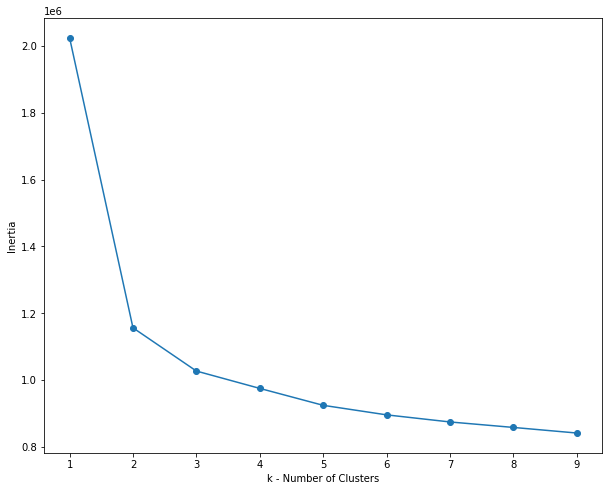

In [37]:
from sklearn.cluster import KMeans 

a = range(1, 10)
l = []
for k in a:
    m = KMeans(n_clusters = k)
    m.fit(n_data)
    l.append(m.inertia_)
plt.figure(figsize=(10,8))
plt.xticks(a)
plt.xlabel('k - Number of Clusters')
plt.ylabel('Inertia')
plt.plot(a,l,'-o')
plt.show()

In [38]:
Kmean = KMeans(2)
Kmean.fit(n_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
Kmean.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [40]:
Kmean.cluster_centers_

array([[ 0.00989804, -0.07471756, -0.06935285, ..., -0.44733287,
         0.5537718 ,  0.49017554],
       [-0.00817991,  0.06174787,  0.05731438, ...,  0.36968349,
        -0.45764643, -0.4050894 ]])

In [41]:
print("Homogeneity_score: "+str(homogeneity_score(labels,Kmean.predict(n_data))))
print("Completeness_score: "+str(completeness_score(labels,Kmean.predict(n_data))))
print("v_measure_score: "+str(v_measure_score(labels,Kmean.predict(n_data))))
print("Inertia: "+str(Kmean.inertia_))
print("silhouette_score: "+str(silhouette_score(n_data, Kmean.predict(n_data), metric='euclidean')))

Homogeneity_score: 0.977400570620251
Completeness_score: 0.977696977792435
v_measure_score: 0.977548751737589
Inertia: 1156484.008987799
silhouette_score: 0.38990168994287766


# PCA

In [42]:
from sklearn.decomposition import PCA 
  
p = PCA(n_components= 2) 
train = p.fit_transform(n_data) 
Kmean.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

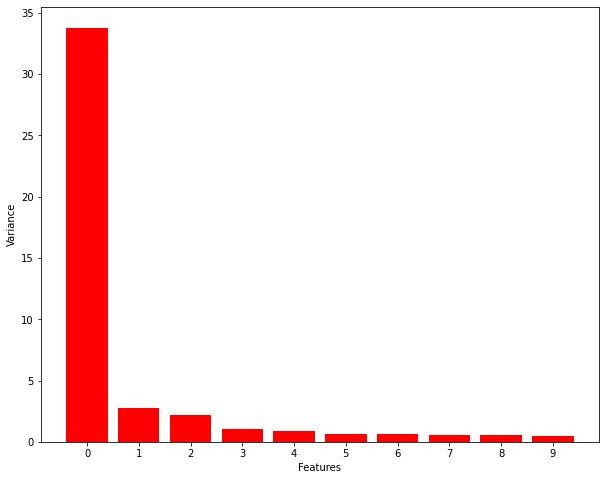

In [43]:
#checking for optimal features

p = PCA(random_state = 21)
p.fit(data)
feature = range(p.n_components_)
plt.figure(figsize=(10, 8))
plt.bar(feature[:10], p.explained_variance_[:10], color='red')
plt.xticks(feature[:10])
plt.xlabel('Features')
plt.ylabel('Variance')
plt.show()

In [44]:
def pca_execution(n):
    p = PCA(n_components = n, random_state = 21)
    d = p.fit_transform(n_data)\

    Kmean2 = KMeans(2)
    Kmean2.fit(d)
    
    print("Homogeneity_score: "+str(homogeneity_score(labels,Kmean2.predict(d))))
    print("Completeness_score: "+str(completeness_score(labels,Kmean2.predict(d))))
    print("v_measure_score: "+str(v_measure_score(labels,Kmean2.predict(d))))
    print("Inertia: "+str(Kmean2.inertia_))
    print("silhouette_score: "+str(silhouette_score(d, Kmean2.predict(d), metric='euclidean')))

In [45]:
pca_execution(n=1)

Homogeneity_score: 0.97567693774092
Completeness_score: 0.9761994671205917
v_measure_score: 0.9759381324885832
Inertia: 168716.31233525547
silhouette_score: 0.7941361821630101
